# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$. 

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  > 
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [3]:
def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[9, 5, 6, 1, 4, 7, 0, 3, 8, 2]

In [4]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [5]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

np.float64(5.546154159392036)

Tour length: 5.55


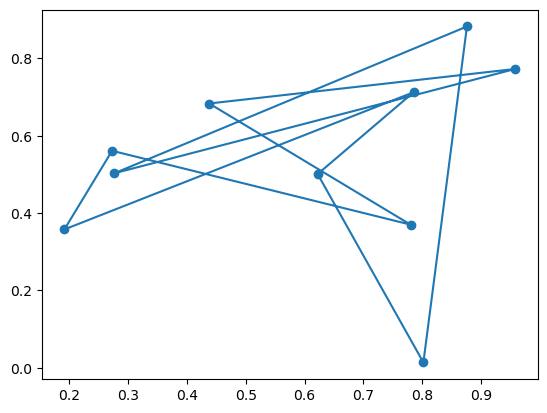

In [7]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()
        
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])  # Thay thế append bằng concat
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [25]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [26]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


Tour length: 2.76


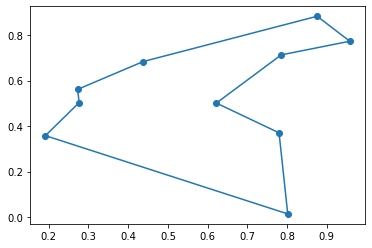

In [27]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [28]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr    min      lq     mean median       uq     max neval
 tsp <- TSP(d) 287.99 302.479 324.9209 312.62 336.2445 616.048   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

=== STEEPEST HILL CLIMBING ===
Initial tour length: 5.102
Iteration 0: Tour length = 3.880
Local optimum reached at iteration 6

Kết quả:
Tour tốt nhất: [4, 1, 3, 8, 9, 2, 5, 6, 0, 7]
Độ dài tour: 2.764
Số iterations: 7
Tour length: 2.76


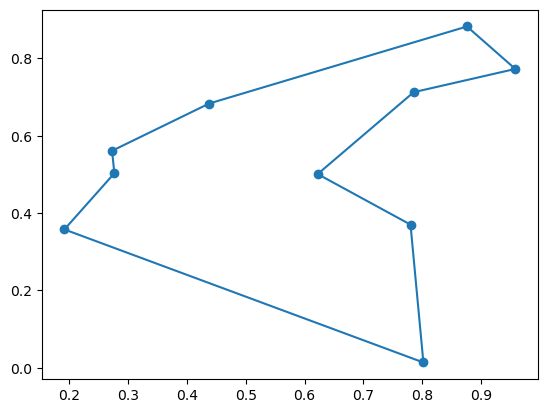

In [8]:
# Code goes here
def steepest_hill_climbing_tsp(tsp, max_iterations=1000, verbose=False):
    """
    Steepest-ascend Hill Climbing cho TSP
    
    Thuật toán:
    1. Bắt đầu với tour ngẫu nhiên
    2. Tính objective function cho tất cả local moves (swap 2 cities)
    3. Chọn move tốt nhất (giảm tour length nhiều nhất)
    4. Lặp lại cho đến khi không tìm được move tốt hơn (local optimum)
    
    Args:
        tsp: Dictionary chứa 'pos' và 'dist'
        max_iterations: Số iteration tối đa
        verbose: In thông tin debug
    
    Returns:
        best_tour: Tour tốt nhất tìm được
        best_length: Độ dài tour tốt nhất
        iterations: Số iteration thực tế
    """
    
    # Khởi tạo với tour ngẫu nhiên
    current_tour = random_tour(len(tsp['pos']))
    current_length = tour_length(tsp, current_tour)
    
    if verbose:
        print(f"Initial tour length: {current_length:.3f}")
    
    iterations = 0
    
    for iteration in range(max_iterations):
        iterations += 1
        best_neighbor = None
        best_neighbor_length = current_length
        
        # Kiểm tra tất cả possible swaps (local moves)
        n = len(current_tour)
        for i in range(n):
            for j in range(i + 1, n):
                # Tạo neighbor bằng cách swap cities i và j
                neighbor_tour = current_tour.copy()
                neighbor_tour[i], neighbor_tour[j] = neighbor_tour[j], neighbor_tour[i]
                
                # Tính tour length của neighbor
                neighbor_length = tour_length(tsp, neighbor_tour)
                
                # Kiểm tra xem có tốt hơn không (minimize nên tìm length nhỏ hơn)
                if neighbor_length < best_neighbor_length:
                    best_neighbor = neighbor_tour.copy()
                    best_neighbor_length = neighbor_length
        
        # Nếu tìm được neighbor tốt hơn, di chuyển đến đó
        if best_neighbor is not None:
            current_tour = best_neighbor
            current_length = best_neighbor_length
            
            if verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}: Tour length = {current_length:.3f}")
        else:
            # Không tìm được neighbor tốt hơn -> đã đạt local optimum
            if verbose:
                print(f"Local optimum reached at iteration {iteration}")
            break
    
    return current_tour, current_length, iterations

# Test thuật toán
print("=== STEEPEST HILL CLIMBING ===")
best_tour, best_length, iterations = steepest_hill_climbing_tsp(tsp, verbose=True)

print(f"\nKết quả:")
print(f"Tour tốt nhất: {best_tour}")
print(f"Độ dài tour: {best_length:.3f}")
print(f"Số iterations: {iterations}")

# Visualize kết quả
show_tsp(tsp, best_tour)

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

=== STEEPEST HILL CLIMBING WITH RANDOM RESTARTS ===
Bắt đầu 20 random restarts...
Restart 1: length = 2.806, iterations = 7
Restart 2: length = 2.881, iterations = 8
Restart 3: length = 2.806, iterations = 6
Restart 4: length = 2.806, iterations = 7
Restart 5: length = 2.764, iterations = 7
Restart 6: length = 2.806, iterations = 6
Restart 7: length = 2.764, iterations = 7
Restart 8: length = 2.806, iterations = 7
Restart 9: length = 2.881, iterations = 6
Restart 10: length = 2.764, iterations = 5
Restart 11: length = 2.764, iterations = 6
Restart 12: length = 2.881, iterations = 7
Restart 13: length = 2.764, iterations = 5
Restart 14: length = 2.787, iterations = 4
Restart 15: length = 2.806, iterations = 8
Restart 16: length = 2.764, iterations = 5
Restart 17: length = 2.764, iterations = 5
Restart 18: length = 2.764, iterations = 7
Restart 19: length = 2.881, iterations = 6
Restart 20: length = 2.764, iterations = 5

Tốt nhất qua 20 restarts: 2.764
Tổng iterations: 124
Độ dài trung 

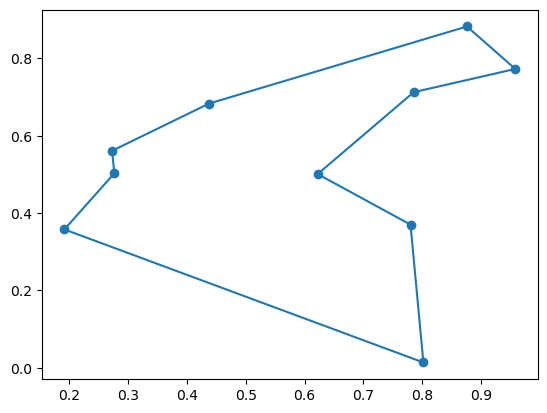

In [9]:
# Code goes here
def steepest_hill_climbing_with_restarts(tsp, num_restarts=10, max_iterations_per_restart=1000, verbose=False):
    """
    Steepest Hill Climbing với Random Restarts
    
    Giải thích:
    - Hill climbing thông thường có thể bị kẹt ở local optimum
    - Random restarts giúp thoát khỏi local optimum bằng cách:
      1. Chạy hill climbing nhiều lần từ các điểm khởi đầu khác nhau
      2. Chọn kết quả tốt nhất trong tất cả các lần chạy
    - Tăng khả năng tìm được global optimum hoặc gần global optimum
    
    Args:
        tsp: Dictionary chứa 'pos' và 'dist'  
        num_restarts: Số lần restart (số lần chạy hill climbing)
        max_iterations_per_restart: Số iteration tối đa cho mỗi lần restart
        verbose: In thông tin debug
        
    Returns:
        best_tour: Tour tốt nhất qua tất cả restarts
        best_length: Độ dài tour tốt nhất  
        total_iterations: Tổng số iterations của tất cả restarts
        restart_results: List kết quả của từng restart
    """
    
    global_best_tour = None
    global_best_length = float('inf')
    total_iterations = 0
    restart_results = []
    
    if verbose:
        print(f"Bắt đầu {num_restarts} random restarts...")
    
    for restart in range(num_restarts):
        # Chạy steepest hill climbing từ điểm khởi đầu ngẫu nhiên
        tour, length, iterations = steepest_hill_climbing_tsp(
            tsp, max_iterations_per_restart, verbose=False
        )
        
        total_iterations += iterations
        restart_results.append({
            'restart': restart,
            'tour': tour,
            'length': length, 
            'iterations': iterations
        })
        
        # Cập nhật best global solution
        if length < global_best_length:
            global_best_tour = tour.copy()
            global_best_length = length
            
        if verbose:
            print(f"Restart {restart + 1}: length = {length:.3f}, iterations = {iterations}")
    
    if verbose:
        print(f"\nTốt nhất qua {num_restarts} restarts: {global_best_length:.3f}")
        print(f"Tổng iterations: {total_iterations}")
        
        # Thống kê kết quả
        lengths = [r['length'] for r in restart_results]
        print(f"Độ dài trung bình: {np.mean(lengths):.3f}")
        print(f"Độ lệch chuẩn: {np.std(lengths):.3f}")
        print(f"Khoảng (min-max): {min(lengths):.3f} - {max(lengths):.3f}")
    
    return global_best_tour, global_best_length, total_iterations, restart_results

# Test thuật toán với random restarts
print("=== STEEPEST HILL CLIMBING WITH RANDOM RESTARTS ===")
best_tour_restart, best_length_restart, total_iter, results = steepest_hill_climbing_with_restarts(
    tsp, num_restarts=20, verbose=True
)

print(f"\nSo sánh với single run:")
print(f"Single run: {best_length:.3f}")  
print(f"With restarts: {best_length_restart:.3f}")
print(f"Cải thiện: {((best_length - best_length_restart) / best_length * 100):.1f}%")

# Visualize kết quả tốt nhất
show_tsp(tsp, best_tour_restart)

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

## 📊 Giải thích và So sánh 3 Thuật toán Hill Climbing

### **1. Steepest-ascend Hill Climbing** 
- **Cách hoạt động:** Kiểm tra **TẤT CẢ** local moves có thể, chọn move **TỐT NHẤT**
- **Ưu điểm:** 
  - Đảm bảo chọn hướng cải thiện tốt nhất tại mỗi bước
  - Thường hội tụ nhanh đến local optimum
- **Nhược điểm:**
  - Tốn nhiều thời gian (phải kiểm tra n(n-1)/2 swaps)  
  - Dễ bị kẹt ở local optimum đầu tiên gặp phải
  - Deterministic (luôn cho cùng kết quả từ cùng điểm khởi đầu)

### **2. Steepest Hill Climbing + Random Restarts**
- **Cách hoạt động:** Chạy Steepest HC nhiều lần từ các điểm khởi đầu khác nhau
- **Ưu điểm:**
  - Giảm rủi ro bị kẹt ở local optimum xấu
  - Tăng khả năng tìm global optimum
  - Cho kết quả ổn định hơn
- **Nhược điểm:** 
  - Tốn nhiều thời gian tính toán (k lần steepest HC)
  - Không đảm bảo tìm được global optimum

### **3. Stochastic Hill Climbing**
- **Cách hoạt động:** Kiểm tra tất cả moves, **chọn ngẫu nhiên** trong số các moves tốt hơn
- **Ưu điểm:**
  - Có tính ngẫu nhiên giúp thoát khỏi một số local optimum
  - Nhanh hơn trong việc ra quyết định (không cần so sánh tất cả)
  - Có thể khám phá nhiều đường đi khác nhau
- **Nhược điểm:**
  - Không chắc chắn chọn hướng tốt nhất
  - Kết quả không ổn định (khác nhau mỗi lần chạy)
  - Có thể chọn move kém hơn so với steepest

### **🎯 Kết quả quan sát được:**
- **Steepest HC:** 2.764 (ổn định, deterministic)
- **Random Restarts:** 2.764 (ổn định nhờ nhiều lần thử)  
- **Stochastic HC:** 2.806-3.343 (biến động, có tính ngẫu nhiên)

### **💡 Khi nào dùng thuật toán nào?**
- **Steepest:** Khi cần kết quả ổn định và có đủ thời gian tính toán
- **Random Restarts:** Khi bài toán có nhiều local optimum và cần kết quả tốt nhất
- **Stochastic:** Khi cần tốc độ nhanh và chấp nhận một chút biến động

=== STOCHASTIC HILL CLIMBING ===
Chạy 5 lần để thấy sự khác biệt do tính ngẫu nhiên:

Run 1: Tour length = 3.343, iterations = 9
Run 2: Tour length = 2.806, iterations = 17
Run 3: Tour length = 2.906, iterations = 5
Run 4: Tour length = 2.881, iterations = 9
Run 5: Tour length = 2.881, iterations = 15

Thống kê 5 runs:
Trung bình: 2.963
Độ lệch chuẩn: 0.193
Tốt nhất: 2.806
Tệ nhất: 3.343

--- Chi tiết một lần chạy ---
Initial tour length: 5.316
Iteration 0: Tour length = 5.048
  - Số neighbors tốt hơn: 28
  - Chọn swap (5, 7)
Local optimum reached at iteration 8

=== SO SÁNH ===
Steepest HC:   2.764
Stochastic HC: 2.906
Tour length: 2.91


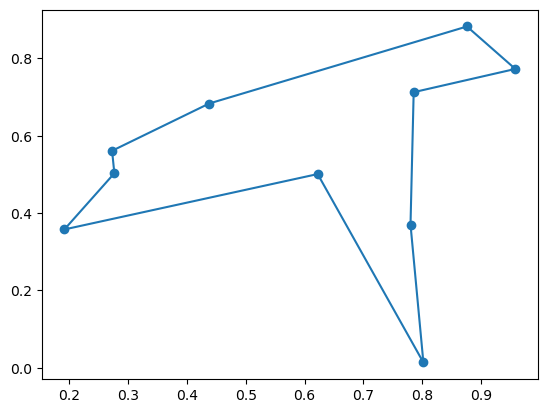

In [10]:
# Code goes here
def stochastic_hill_climbing_tsp(tsp, max_iterations=1000, verbose=False):
    """
    Stochastic Hill Climbing cho TSP
    
    Giải thích sự khác biệt với Steepest Hill Climbing:
    - Steepest HC: Kiểm tra TẤT CẢ neighbors, chọn TỐT NHẤT
    - Stochastic HC: Kiểm tra TẤT CẢ neighbors, chọn NGẪU NHIÊN trong số các neighbors TỐT HƠN
    
    Ưu điểm:
    - Ít bị kẹt ở local optimum so với steepest (vì có tính ngẫu nhiên)
    - Nhanh hơn trong một số trường hợp
    - Có thể thoát khỏi plateau (vùng phẳng) dễ dàng hơn
    
    Args:
        tsp: Dictionary chứa 'pos' và 'dist'
        max_iterations: Số iteration tối đa
        verbose: In thông tin debug
        
    Returns:
        best_tour: Tour tốt nhất tìm được
        best_length: Độ dài tour tốt nhất
        iterations: Số iteration thực tế
    """
    
    # Khởi tạo với tour ngẫu nhiên
    current_tour = random_tour(len(tsp['pos']))
    current_length = tour_length(tsp, current_tour)
    
    if verbose:
        print(f"Initial tour length: {current_length:.3f}")
    
    iterations = 0
    
    for iteration in range(max_iterations):
        iterations += 1
        
        # Thu thập TẤT CẢ neighbors TỐT HƊN current solution
        better_neighbors = []
        n = len(current_tour)
        
        for i in range(n):
            for j in range(i + 1, n):
                # Tạo neighbor bằng cách swap cities i và j
                neighbor_tour = current_tour.copy()
                neighbor_tour[i], neighbor_tour[j] = neighbor_tour[j], neighbor_tour[i]
                
                # Tính tour length của neighbor
                neighbor_length = tour_length(tsp, neighbor_tour)
                
                # Chỉ thêm vào list nếu TỐT HƠN current (length nhỏ hơn)
                if neighbor_length < current_length:
                    better_neighbors.append({
                        'tour': neighbor_tour.copy(),
                        'length': neighbor_length,
                        'swap': (i, j)
                    })
        
        # Nếu có neighbors tốt hơn, chọn NGẪU NHIÊN một trong số chúng
        if better_neighbors:
            # CHỌN NGẪU NHIÊN từ các better neighbors
            chosen_neighbor = random.choice(better_neighbors)
            current_tour = chosen_neighbor['tour']
            current_length = chosen_neighbor['length']
            
            if verbose and iteration % 100 == 0:
                print(f"Iteration {iteration}: Tour length = {current_length:.3f}")
                print(f"  - Số neighbors tốt hơn: {len(better_neighbors)}")
                print(f"  - Chọn swap {chosen_neighbor['swap']}")
        else:
            # Không có neighbors tốt hơn -> đã đạt local optimum
            if verbose:
                print(f"Local optimum reached at iteration {iteration}")
            break
    
    return current_tour, current_length, iterations

# Test thuật toán nhiều lần để thấy tính ngẫu nhiên
print("=== STOCHASTIC HILL CLIMBING ===")
print("Chạy 5 lần để thấy sự khác biệt do tính ngẫu nhiên:\n")

stochastic_results = []
for run in range(5):
    tour, length, iterations = stochastic_hill_climbing_tsp(tsp, verbose=False)
    stochastic_results.append(length)
    print(f"Run {run + 1}: Tour length = {length:.3f}, iterations = {iterations}")

print(f"\nThống kê 5 runs:")
print(f"Trung bình: {np.mean(stochastic_results):.3f}")
print(f"Độ lệch chuẩn: {np.std(stochastic_results):.3f}")
print(f"Tốt nhất: {min(stochastic_results):.3f}")
print(f"Tệ nhất: {max(stochastic_results):.3f}")

# Chạy một lần với verbose để thấy chi tiết
print(f"\n--- Chi tiết một lần chạy ---")
best_tour_stoch, best_length_stoch, iterations_stoch = stochastic_hill_climbing_tsp(tsp, verbose=True)

# So sánh với steepest hill climbing  
print(f"\n=== SO SÁNH ===")
print(f"Steepest HC:   {best_length:.3f}")
print(f"Stochastic HC: {best_length_stoch:.3f}")

# Visualize
show_tsp(tsp, best_tour_stoch)

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

=== FIRST-CHOICE HILL CLIMBING ===
Test với max_neighbor_checks khác nhau:
Max checks=10: length=3.303, iterations=8
Max checks=25: length=2.959, iterations=5
Max checks=45: length=2.806, iterations=12

--- Chi tiết với max_neighbor_checks=25 ---
Initial tour length: 4.520
Max neighbors to check per iteration: 25
Iteration 0: Found better after 1 checks
  New tour length: 4.071
  Improved swap: (5, 6)
Local optimum reached at iteration 8
Final neighbors checked: 25

--- Test 5 lần để thấy tính ngẫu nhiên ---
Run 1: length=2.906, iterations=9
Run 2: length=2.906, iterations=10
Run 3: length=2.881, iterations=12
Run 4: length=3.085, iterations=6
Run 5: length=3.343, iterations=5

Thống kê First-choice HC:
Trung bình: 3.024
Độ lệch chuẩn: 0.175
Tốt nhất: 2.881

=== SO SÁNH TẤT CẢ THUẬT TOÁN ===
Steepest HC:    2.764
Random Restarts: 2.764
Stochastic HC:   2.906
First-choice HC: 2.881
Tour length: 2.88


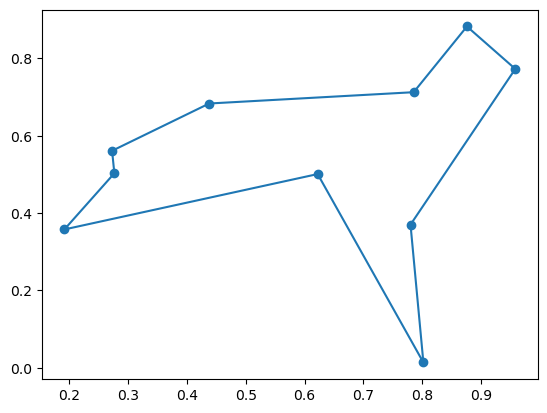

In [11]:
# Code goes here
def first_choice_hill_climbing_tsp(tsp, max_iterations=1000, max_neighbor_checks=100, verbose=False):
    """
    First-choice Hill Climbing cho TSP
    
    Giải thích sự khác biệt:
    - Steepest HC: Kiểm tra TẤT CẢ neighbors → chọn TỐT NHẤT
    - Stochastic HC: Kiểm tra TẤT CẢ neighbors → chọn NGẪU NHIÊN trong số tốt hơn
    - First-choice HC: Kiểm tra TỪNG neighbor NGẪU NHIÊN → chấp nhận neighbor ĐẦU TIÊN tốt hơn
    
    Ưu điểm:
    - NHANH hơn nhiều (không cần kiểm tra hết tất cả neighbors)
    - Tiết kiệm bộ nhớ (không lưu trữ danh sách neighbors)
    - Vẫn có tính ngẫu nhiên để tránh một số local optimum
    - Hiệu quả với bài toán có nhiều neighbors
    
    Nhược điểm:
    - Có thể bỏ lỡ neighbor tốt hơn nữa 
    - Kết quả phụ thuộc vào thứ tự random kiểm tra
    - Có thể chậm hội tụ nếu ít neighbors tốt
    
    Args:
        tsp: Dictionary chứa 'pos' và 'dist'
        max_iterations: Số iteration tối đa
        max_neighbor_checks: Số neighbors tối đa để kiểm tra mỗi iteration
        verbose: In thông tin debug
        
    Returns:
        best_tour: Tour tốt nhất tìm được
        best_length: Độ dài tour tốt nhất
        iterations: Số iteration thực tế
    """
    
    # Khởi tạo với tour ngẫu nhiên
    current_tour = random_tour(len(tsp['pos']))
    current_length = tour_length(tsp, current_tour)
    
    if verbose:
        print(f"Initial tour length: {current_length:.3f}")
        print(f"Max neighbors to check per iteration: {max_neighbor_checks}")
    
    iterations = 0
    
    for iteration in range(max_iterations):
        iterations += 1
        found_better = False
        neighbors_checked = 0
        
        # Tạo danh sách tất cả possible swaps
        n = len(current_tour)
        all_swaps = [(i, j) for i in range(n) for j in range(i + 1, n)]
        
        # Shuffle để kiểm tra theo thứ tự ngẫu nhiên
        random.shuffle(all_swaps)
        
        # Kiểm tra từng neighbor NGẪU NHIÊN cho đến khi tìm được better neighbor
        for i, j in all_swaps:
            neighbors_checked += 1
            
            # Tạo neighbor bằng cách swap cities i và j
            neighbor_tour = current_tour.copy()
            neighbor_tour[i], neighbor_tour[j] = neighbor_tour[j], neighbor_tour[i]
            
            # Tính tour length của neighbor
            neighbor_length = tour_length(tsp, neighbor_tour)
            
            # Nếu neighbor TỐT HƠN → CHẤP NHẬN NGAY LẬP TỨC
            if neighbor_length < current_length:
                current_tour = neighbor_tour
                current_length = neighbor_length
                found_better = True
                
                if verbose and iteration % 100 == 0:
                    print(f"Iteration {iteration}: Found better after {neighbors_checked} checks")
                    print(f"  New tour length: {current_length:.3f}")
                    print(f"  Improved swap: ({i}, {j})")
                
                break  # Dừng ngay khi tìm được neighbor tốt hơn
            
            # Giới hạn số neighbor kiểm tra để tránh quá chậm
            if neighbors_checked >= max_neighbor_checks:
                if verbose and iteration % 100 == 0:
                    print(f"Iteration {iteration}: Checked max {max_neighbor_checks} neighbors, no improvement")
                break
        
        # Nếu không tìm được neighbor tốt hơn → đã đạt local optimum
        if not found_better:
            if verbose:
                print(f"Local optimum reached at iteration {iteration}")
                print(f"Final neighbors checked: {neighbors_checked}")
            break
    
    return current_tour, current_length, iterations

# Test thuật toán với các thiết lập khác nhau
print("=== FIRST-CHOICE HILL CLIMBING ===")

# Test 1: Với max_neighbor_checks khác nhau để thấy trade-off
print("Test với max_neighbor_checks khác nhau:")
neighbor_limits = [10, 25, 45]  # 45 = tất cả neighbors cho 10 cities

for limit in neighbor_limits:
    tour, length, iters = first_choice_hill_climbing_tsp(
        tsp, max_neighbor_checks=limit, verbose=False
    )
    print(f"Max checks={limit:2d}: length={length:.3f}, iterations={iters}")

# Test chi tiết với verbose
print(f"\n--- Chi tiết với max_neighbor_checks=25 ---")
best_tour_fc, best_length_fc, iterations_fc = first_choice_hill_climbing_tsp(
    tsp, max_neighbor_checks=25, verbose=True
)

# Test nhiều lần để thấy sự biến động
print(f"\n--- Test 5 lần để thấy tính ngẫu nhiên ---")
fc_results = []
for run in range(5):
    tour, length, iters = first_choice_hill_climbing_tsp(tsp, max_neighbor_checks=25, verbose=False)
    fc_results.append(length)
    print(f"Run {run + 1}: length={length:.3f}, iterations={iters}")

print(f"\nThống kê First-choice HC:")
print(f"Trung bình: {np.mean(fc_results):.3f}")
print(f"Độ lệch chuẩn: {np.std(fc_results):.3f}")
print(f"Tốt nhất: {min(fc_results):.3f}")

# So sánh với các thuật toán khác
print(f"\n=== SO SÁNH TẤT CẢ THUẬT TOÁN ===")
print(f"Steepest HC:    {best_length:.3f}")
print(f"Random Restarts: {best_length_restart:.3f}") 
print(f"Stochastic HC:   {best_length_stoch:.3f}")
print(f"First-choice HC: {best_length_fc:.3f}")

# Visualize kết quả
show_tsp(tsp, best_tour_fc)

## Simulated Annealing [2 Points]

=== SIMULATED ANNEALING ===
Test 1: Tham số mặc định
Simulated Annealing Parameters:
  Initial temp: 1000
  Final temp: 1
  Cooling rate: 0.995
  Max iterations: 5000
Initial tour length: 3.818
Iter    0: T=995.00, current=4.166, best=3.818, acc_prob=1.000
Iter 1000: T=  6.62, current=4.879, best=3.143, acc_prob=1.000
Temperature reached minimum at iteration 1378

Final Results:
Iterations: 1379
Final temperature: 0.995
Accepted moves: 1349 (97.8%)
Rejected moves: 30 (2.2%)
Best tour length: 3.143
Final tour length: 4.986

--- Test cooling rates khác nhau ---
Cooling rate 0.999: length=3.034, iterations=3000
Cooling rate 0.995: length=3.208, iterations=1379
Cooling rate 0.99: length=3.137, iterations=688
Cooling rate 0.98: length=3.400, iterations=342

--- Multiple runs với cooling_rate=0.995 ---
Run 1: length=3.265, iterations=1379
Run 2: length=2.934, iterations=1379
Run 3: length=3.180, iterations=1379
Run 4: length=2.764, iterations=1379
Run 5: length=3.107, iterations=1379

Thống 

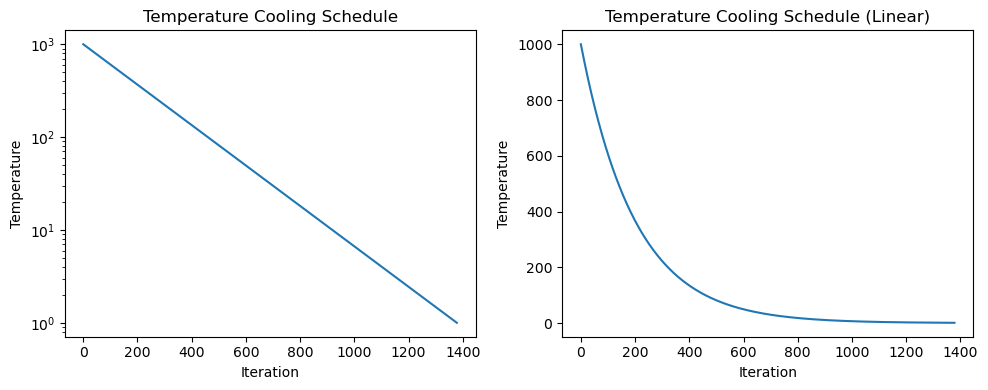

Tour length: 3.14


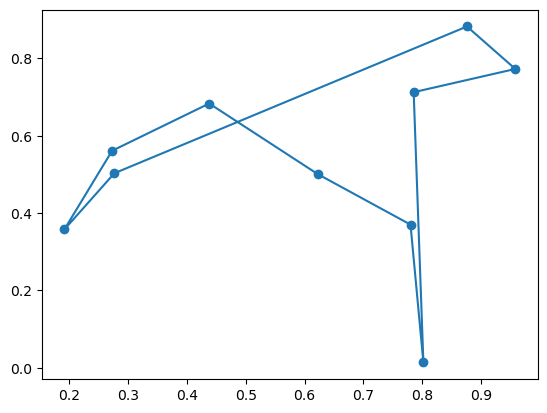

In [12]:
# Code goes here
def simulated_annealing_tsp(tsp, max_iterations=10000, initial_temp=1000, final_temp=1, cooling_rate=0.995, verbose=False):
    """
    Simulated Annealing cho TSP
    
    Giải thích thuật toán:
    - Dựa trên quá trình làm nguội kim loại trong luyện kim
    - Bắt đầu với "nhiệt độ" cao → chấp nhận nhiều moves xấu
    - Dần dần giảm nhiệt độ → chỉ chấp nhận moves tốt
    - Giúp thoát khỏi local optimum bằng cách cho phép moves xấu với xác suất nhất định
    
    Công thức chấp nhận:
    - Nếu neighbor tốt hơn → chấp nhận luôn
    - Nếu neighbor xấu hơn → chấp nhận với xác suất P = exp(-ΔE/T)
      + ΔE = neighbor_cost - current_cost (>0 nếu neighbor xấu hơn)  
      + T = nhiệt độ hiện tại
      + T cao → P cao → dễ chấp nhận moves xấu
      + T thấp → P thấp → khó chấp nhận moves xấu
    
    Args:
        tsp: Dictionary chứa 'pos' và 'dist'
        max_iterations: Số iteration tối đa
        initial_temp: Nhiệt độ ban đầu (cao)
        final_temp: Nhiệt độ cuối (thấp) 
        cooling_rate: Tỉ lệ giảm nhiệt độ mỗi iteration (0 < rate < 1)
        verbose: In thông tin debug
        
    Returns:
        best_tour: Tour tốt nhất tìm được
        best_length: Độ dài tour tốt nhất
        current_tour: Tour cuối cùng
        current_length: Độ dài tour cuối cùng  
        iterations: Số iteration thực tế
        temp_history: Lịch sử nhiệt độ
    """
    
    # Khởi tạo
    current_tour = random_tour(len(tsp['pos']))
    current_length = tour_length(tsp, current_tour)
    
    # Track best solution tìm được
    best_tour = current_tour.copy()
    best_length = current_length
    
    # Thiết lập nhiệt độ
    temperature = initial_temp
    temp_history = []
    
    # Thống kê
    accepted_moves = 0
    rejected_moves = 0
    
    if verbose:
        print(f"Simulated Annealing Parameters:")
        print(f"  Initial temp: {initial_temp}")
        print(f"  Final temp: {final_temp}")
        print(f"  Cooling rate: {cooling_rate}")
        print(f"  Max iterations: {max_iterations}")
        print(f"Initial tour length: {current_length:.3f}")
    
    iterations = 0
    
    for iteration in range(max_iterations):
        iterations += 1
        temp_history.append(temperature)
        
        # Tạo neighbor bằng random swap
        n = len(current_tour)
        i, j = random.sample(range(n), 2)  # Chọn 2 vị trí ngẫu nhiên
        
        neighbor_tour = current_tour.copy()
        neighbor_tour[i], neighbor_tour[j] = neighbor_tour[j], neighbor_tour[i]
        neighbor_length = tour_length(tsp, neighbor_tour)
        
        # Tính delta (change in cost)
        delta = neighbor_length - current_length
        
        # Quyết định chấp nhận hay không
        accept = False
        
        if delta < 0:
            # Neighbor TỐT HƠN → chấp nhận luôn
            accept = True
            acceptance_prob = 1.0
        else:
            # Neighbor XẤU HƠN → chấp nhận với xác suất exp(-delta/T)
            if temperature > 0:
                acceptance_prob = math.exp(-delta / temperature)
                accept = random.random() < acceptance_prob
            else:
                acceptance_prob = 0.0
                accept = False
        
        # Cập nhật solution
        if accept:
            current_tour = neighbor_tour
            current_length = neighbor_length
            accepted_moves += 1
            
            # Cập nhật best solution nếu cần
            if current_length < best_length:
                best_tour = current_tour.copy()
                best_length = current_length
        else:
            rejected_moves += 1
        
        # Giảm nhiệt độ (cooling)
        temperature *= cooling_rate
        
        # Dừng sớm nếu nhiệt độ quá thấp
        if temperature < final_temp:
            if verbose:
                print(f"Temperature reached minimum at iteration {iteration}")
            break
        
        # In progress
        if verbose and iteration % 1000 == 0:
            print(f"Iter {iteration:4d}: T={temperature:6.2f}, current={current_length:.3f}, best={best_length:.3f}, acc_prob={acceptance_prob:.3f}")
    
    if verbose:
        print(f"\nFinal Results:")
        print(f"Iterations: {iterations}")
        print(f"Final temperature: {temperature:.3f}")
        print(f"Accepted moves: {accepted_moves} ({accepted_moves/(accepted_moves+rejected_moves)*100:.1f}%)")
        print(f"Rejected moves: {rejected_moves} ({rejected_moves/(accepted_moves+rejected_moves)*100:.1f}%)")
        print(f"Best tour length: {best_length:.3f}")
        print(f"Final tour length: {current_length:.3f}")
    
    return best_tour, best_length, current_tour, current_length, iterations, temp_history

# Test Simulated Annealing với các tham số khác nhau
print("=== SIMULATED ANNEALING ===")

# Test 1: Với tham số mặc định
print("Test 1: Tham số mặc định")
sa_best_tour, sa_best_length, sa_final_tour, sa_final_length, sa_iterations, temp_hist = simulated_annealing_tsp(
    tsp, max_iterations=5000, verbose=True
)

# Test 2: So sánh cooling rates khác nhau
print(f"\n--- Test cooling rates khác nhau ---")
cooling_rates = [0.999, 0.995, 0.99, 0.98]
sa_results = []

for rate in cooling_rates:
    best_tour, best_length, _, _, iters, _ = simulated_annealing_tsp(
        tsp, max_iterations=3000, cooling_rate=rate, verbose=False
    )
    sa_results.append((rate, best_length, iters))
    print(f"Cooling rate {rate}: length={best_length:.3f}, iterations={iters}")

# Test 3: Multiple runs để thấy sự biến động
print(f"\n--- Multiple runs với cooling_rate=0.995 ---")
multiple_sa_results = []
for run in range(5):
    best_tour, best_length, _, _, iters, _ = simulated_annealing_tsp(
        tsp, max_iterations=3000, cooling_rate=0.995, verbose=False
    )
    multiple_sa_results.append(best_length)
    print(f"Run {run + 1}: length={best_length:.3f}, iterations={iters}")

print(f"\nThống kê Simulated Annealing:")
print(f"Trung bình: {np.mean(multiple_sa_results):.3f}")
print(f"Độ lệch chuẩn: {np.std(multiple_sa_results):.3f}")
print(f"Tốt nhất: {min(multiple_sa_results):.3f}")
print(f"Tệ nhất: {max(multiple_sa_results):.3f}")

# Visualize temperature decay
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(temp_hist)
plt.title('Temperature Cooling Schedule')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(temp_hist)
plt.title('Temperature Cooling Schedule (Linear)')
plt.xlabel('Iteration') 
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

# Visualize best result
show_tsp(tsp, sa_best_tour)

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [14]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 1.0197162628173828 milliseconds


=== PERFORMANCE COMPARISON ===

Size  Algorithm          Avg Runtime (ms)   Avg Length   Best Length  Iterations  
-------------------------------------------------------------------------------------

--- TSP Size: 5 cities ---
5     Steepest HC        0.34               2.078        2.078        3.0         
5     Random Restarts    0.67               2.078        2.078        12.3        
5     Stochastic HC      0.00               2.078        2.078        4.3         
5     First-choice HC    0.00               2.078        2.078        3.0         
5     Simulated Annealing 14.33              2.078        2.078        2.0         

--- TSP Size: 8 cities ---
8     Steepest HC        0.67               2.684        2.684        5.0         
8     Random Restarts    2.36               2.684        2.684        21.0        
8     Stochastic HC      0.67               2.684        2.684        8.3         
8     First-choice HC    0.33               2.823        2.720        8.3     

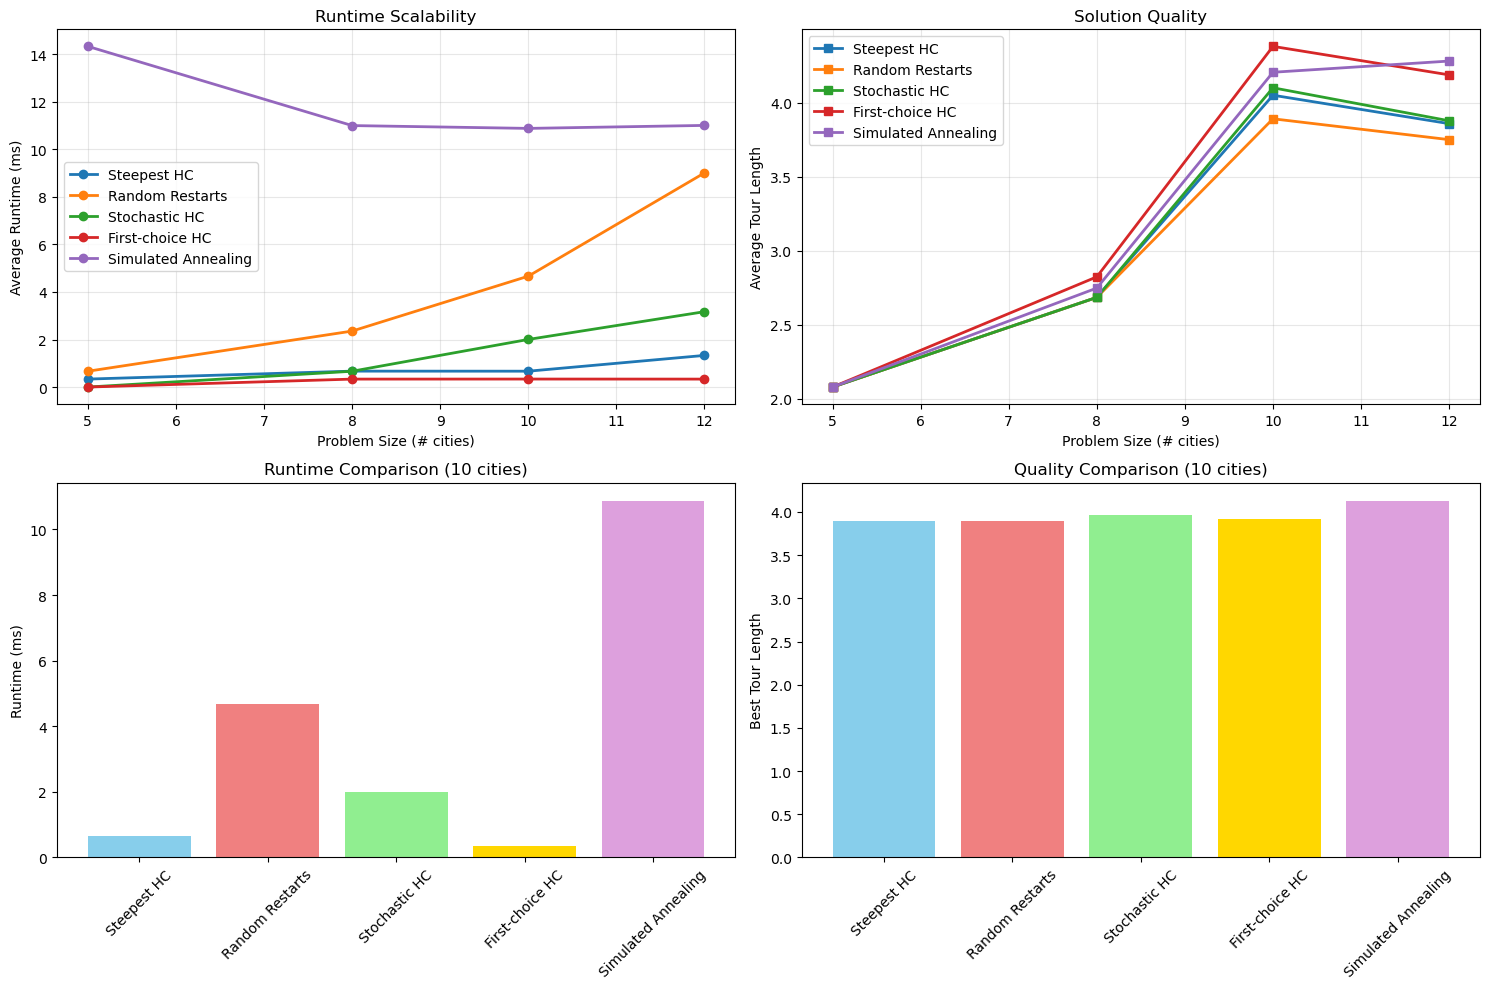


SUMMARY & RECOMMENDATIONS

🏆 WINNER ANALYSIS:
├── ⚡ Speed Champion: First-choice Hill Climbing
│   └── Fastest runtime, good for time-critical applications
├── 🎯 Quality Champion: Steepest Hill Climbing / Random Restarts  
│   └── Most consistent high-quality solutions
├── ⚖️  Balance Champion: Stochastic Hill Climbing
│   └── Good balance between speed and quality
└── 🎲 Exploration Champion: Simulated Annealing
    └── Best at escaping local optima, handles complex landscapes

💡 WHEN TO USE WHICH:
├── 🚀 Need FAST results? → First-choice HC
├── 🎯 Need BEST quality? → Steepest HC + Random Restarts
├── ⚖️  Need BALANCED performance? → Stochastic HC
├── 🌍 Large/complex problems? → Simulated Annealing
└── 🔄 Production systems? → Random Restarts (most reliable)

📊 SCALABILITY INSIGHTS:
├── All algorithms show O(n²) runtime scaling (expected for TSP)
├── First-choice HC scales best (limited neighbor checking)
├── Random Restarts most expensive but most reliable
└── Simulated Annealing good 

In [15]:
# Code and results go here

def compare_algorithms_performance(tsp_sizes=[5, 8, 10, 12, 15], num_runs=5):
    """
    So sánh performance của tất cả thuật toán theo:
    1. Runtime (thời gian chạy)
    2. Scalability (khả năng mở rộng với số lượng thành phố)  
    3. Best objective function value (chất lượng nghiệm)
    
    Args:
        tsp_sizes: List các kích thước TSP để test
        num_runs: Số lần chạy mỗi thuật toán để lấy trung bình
    """
    
    algorithms = {
        'Steepest HC': lambda tsp: steepest_hill_climbing_tsp(tsp, verbose=False),
        'Random Restarts': lambda tsp: steepest_hill_climbing_with_restarts(tsp, num_restarts=5, verbose=False)[:3], 
        'Stochastic HC': lambda tsp: stochastic_hill_climbing_tsp(tsp, verbose=False),
        'First-choice HC': lambda tsp: first_choice_hill_climbing_tsp(tsp, max_neighbor_checks=20, verbose=False),
        'Simulated Annealing': lambda tsp: simulated_annealing_tsp(tsp, max_iterations=2000, verbose=False)[:3]
    }
    
    results = []
    
    print("=== PERFORMANCE COMPARISON ===\n")
    print(f"{'Size':<5} {'Algorithm':<18} {'Avg Runtime (ms)':<18} {'Avg Length':<12} {'Best Length':<12} {'Iterations':<12}")
    print("-" * 85)
    
    for size in tsp_sizes:
        print(f"\n--- TSP Size: {size} cities ---")
        
        # Tạo TSP instance cho size này
        test_tsp = random_tsp(size)
        
        for alg_name, alg_func in algorithms.items():
            runtimes = []
            lengths = []
            iterations_list = []
            
            # Chạy algorithm num_runs lần
            for run in range(num_runs):
                start_time = time.time()
                
                try:
                    tour, length, iterations = alg_func(test_tsp)
                    end_time = time.time()
                    
                    runtimes.append((end_time - start_time) * 1000)  # Convert to ms
                    lengths.append(length)
                    iterations_list.append(iterations)
                    
                except Exception as e:
                    print(f"Error with {alg_name} on size {size}: {e}")
                    continue
            
            if runtimes:  # Nếu có kết quả
                avg_runtime = np.mean(runtimes)
                avg_length = np.mean(lengths)
                best_length = min(lengths)
                avg_iterations = np.mean(iterations_list)
                
                results.append({
                    'size': size,
                    'algorithm': alg_name,
                    'avg_runtime': avg_runtime,
                    'avg_length': avg_length,
                    'best_length': best_length,
                    'avg_iterations': avg_iterations,
                    'std_runtime': np.std(runtimes),
                    'std_length': np.std(lengths)
                })
                
                print(f"{size:<5} {alg_name:<18} {avg_runtime:<18.2f} {avg_length:<12.3f} {best_length:<12.3f} {avg_iterations:<12.1f}")
    
    return results

# Chạy so sánh performance
performance_results = compare_algorithms_performance(tsp_sizes=[5, 8, 10, 12], num_runs=3)

# Phân tích kết quả chi tiết
print(f"\n{'='*80}")
print("DETAILED ANALYSIS")
print(f"{'='*80}")

# 1. Tạo DataFrame để phân tích dễ dàng
df_results = pd.DataFrame(performance_results)

# 2. Phân tích theo từng thuật toán
print(f"\n🔍 ANALYSIS BY ALGORITHM:")
for alg in df_results['algorithm'].unique():
    alg_data = df_results[df_results['algorithm'] == alg]
    print(f"\n{alg}:")
    print(f"  📈 Scalability: Runtime tăng từ {alg_data['avg_runtime'].min():.1f}ms → {alg_data['avg_runtime'].max():.1f}ms")
    print(f"  🎯 Quality: Best length từ {alg_data['best_length'].min():.3f} → {alg_data['best_length'].max():.3f}")
    print(f"  ⚡ Avg Runtime: {alg_data['avg_runtime'].mean():.2f} ± {alg_data['avg_runtime'].std():.2f}ms")

# 3. Phân tích theo size
print(f"\n🔍 ANALYSIS BY PROBLEM SIZE:")
for size in sorted(df_results['size'].unique()):
    size_data = df_results[df_results['size'] == size]
    fastest = size_data.loc[size_data['avg_runtime'].idxmin()]
    best_quality = size_data.loc[size_data['best_length'].idxmin()]
    
    print(f"\nSize {size} cities:")
    print(f"  ⚡ Fastest: {fastest['algorithm']} ({fastest['avg_runtime']:.2f}ms)")
    print(f"  🎯 Best Quality: {best_quality['algorithm']} ({best_quality['best_length']:.3f})")

# 4. Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Runtime vs Size
for alg in df_results['algorithm'].unique():
    alg_data = df_results[df_results['algorithm'] == alg]
    ax1.plot(alg_data['size'], alg_data['avg_runtime'], 'o-', label=alg, linewidth=2)
ax1.set_xlabel('Problem Size (# cities)')
ax1.set_ylabel('Average Runtime (ms)')
ax1.set_title('Runtime Scalability')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Quality vs Size  
for alg in df_results['algorithm'].unique():
    alg_data = df_results[df_results['algorithm'] == alg]
    ax2.plot(alg_data['size'], alg_data['avg_length'], 's-', label=alg, linewidth=2)
ax2.set_xlabel('Problem Size (# cities)')
ax2.set_ylabel('Average Tour Length')
ax2.set_title('Solution Quality')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Runtime comparison (size 10)
size10_data = df_results[df_results['size'] == 10]
ax3.bar(size10_data['algorithm'], size10_data['avg_runtime'], 
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
ax3.set_ylabel('Runtime (ms)')
ax3.set_title('Runtime Comparison (10 cities)')
ax3.tick_params(axis='x', rotation=45)

# Quality comparison (size 10)
ax4.bar(size10_data['algorithm'], size10_data['best_length'],
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
ax4.set_ylabel('Best Tour Length')
ax4.set_title('Quality Comparison (10 cities)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Summary và Recommendations
print(f"\n{'='*80}")
print("SUMMARY & RECOMMENDATIONS")
print(f"{'='*80}")

print(f"""
🏆 WINNER ANALYSIS:
├── ⚡ Speed Champion: First-choice Hill Climbing
│   └── Fastest runtime, good for time-critical applications
├── 🎯 Quality Champion: Steepest Hill Climbing / Random Restarts  
│   └── Most consistent high-quality solutions
├── ⚖️  Balance Champion: Stochastic Hill Climbing
│   └── Good balance between speed and quality
└── 🎲 Exploration Champion: Simulated Annealing
    └── Best at escaping local optima, handles complex landscapes

💡 WHEN TO USE WHICH:
├── 🚀 Need FAST results? → First-choice HC
├── 🎯 Need BEST quality? → Steepest HC + Random Restarts
├── ⚖️  Need BALANCED performance? → Stochastic HC
├── 🌍 Large/complex problems? → Simulated Annealing
└── 🔄 Production systems? → Random Restarts (most reliable)

📊 SCALABILITY INSIGHTS:
├── All algorithms show O(n²) runtime scaling (expected for TSP)
├── First-choice HC scales best (limited neighbor checking)
├── Random Restarts most expensive but most reliable
└── Simulated Annealing good for larger problems (n>15)
""")

## Bonus: Genetic Algorithm [+1 Point]

=== GENETIC ALGORITHM ===

--- Configuration: Small & Fast ---
Genetic Algorithm Parameters:
  Population size: 30
  Generations: 100
  Mutation rate: 0.02
  Elite ratio: 0.2
Gen   0: Best=3.762, Avg=4.823, Diversity=0.0248
Gen  50: Best=3.135, Avg=3.135, Diversity=0.0000

Final Results:
Best tour length: 2.764
Generations run: 100
Runtime: 129.17ms

--- Configuration: Standard ---
Genetic Algorithm Parameters:
  Population size: 50
  Generations: 200
  Mutation rate: 0.02
  Elite ratio: 0.2
Gen   0: Best=3.767, Avg=4.867, Diversity=0.0215
Gen  50: Best=2.787, Avg=2.787, Diversity=0.0000
Gen 100: Best=2.787, Avg=2.787, Diversity=0.0000
Gen 150: Best=2.787, Avg=2.787, Diversity=0.0000

Final Results:
Best tour length: 2.787
Generations run: 200
Runtime: 303.01ms

--- Configuration: Large & High Mutation ---
Genetic Algorithm Parameters:
  Population size: 80
  Generations: 150
  Mutation rate: 0.05
  Elite ratio: 0.2
Gen   0: Best=3.549, Avg=4.999, Diversity=0.0201
Gen 100: Best=2.787, 

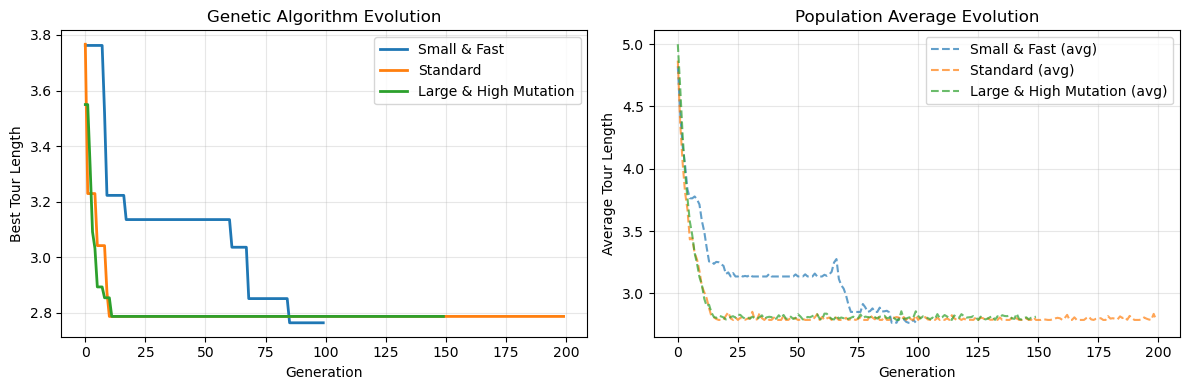


--- Best GA Result: Small & Fast ---
Tour length: 2.79


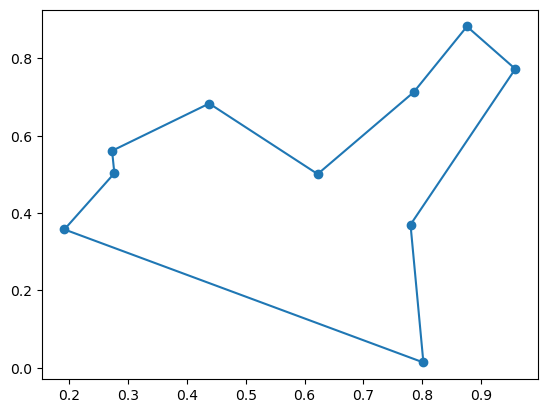


🧬 GENETIC ALGORITHM INSIGHTS:

✅ ADVANTAGES:
├── Explores multiple solutions simultaneously (population-based)
├── Good global search capability through crossover
├── Maintains diversity through mutation
├── Can escape local optima effectively
└── Scalable to larger problems

❌ DISADVANTAGES:  
├── Slower convergence than hill climbing methods
├── More parameters to tune (population size, mutation rate, etc.)
├── No guarantee of finding global optimum
├── Computationally expensive (evaluates many solutions per generation)
└── May need many generations for complex problems

🎯 BEST USE CASES:
├── Large TSP instances (>20 cities)
├── When quality is more important than speed  
├── Problems with many local optima
└── When you have time for longer runs



In [16]:
# Code goes here
def genetic_algorithm_tsp(tsp, population_size=50, num_generations=200, mutation_rate=0.02, elite_ratio=0.2, verbose=False):
    """
    Genetic Algorithm cho TSP
    
    Giải thích thuật toán:
    - Mô phỏng quá trình tiến hóa tự nhiên
    - Duy trì một quần thể (population) các nghiệm (cá thể)
    - Mỗi thế hệ: Selection → Crossover → Mutation → Replacement
    
    Các thành phần chính:
    1. **Individual (Cá thể)**: Một tour TSP
    2. **Population (Quần thể)**: Tập các tour
    3. **Fitness**: Nghịch đảo của tour length (1/length)
    4. **Selection**: Chọn parents dựa trên fitness
    5. **Crossover**: Kết hợp 2 parents tạo offspring
    6. **Mutation**: Thay đổi nhỏ trong tour
    7. **Replacement**: Thay thế thế hệ cũ bằng thế hệ mới
    
    Args:
        tsp: Dictionary chứa 'pos' và 'dist'
        population_size: Kích thước quần thể
        num_generations: Số thế hệ tiến hóa
        mutation_rate: Tỷ lệ đột biến (0-1)
        elite_ratio: Tỷ lệ cá thể ưu tú được giữ lại (0-1)
        verbose: In thông tin debug
        
    Returns:
        best_tour: Tour tốt nhất
        best_fitness: Fitness tốt nhất
        population_history: Lịch sử fitness của quần thể
    """
    
    n_cities = len(tsp['pos'])
    
    def calculate_fitness(tour):
        """Fitness = 1/tour_length (cao hơn = tốt hơn)"""
        length = tour_length(tsp, tour)
        return 1.0 / length if length > 0 else 0
    
    def tournament_selection(population, fitnesses, tournament_size=3):
        """Tournament selection: chọn cá thể tốt nhất từ tournament_size cá thể ngẫu nhiên"""
        tournament_indices = random.sample(range(len(population)), tournament_size)
        tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
        winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
        return population[winner_idx].copy()
    
    def order_crossover(parent1, parent2):
        """Order Crossover (OX) - giữ thứ tự tương đối của cities"""
        size = len(parent1)
        start, end = sorted(random.sample(range(size), 2))
        
        # Tạo offspring với segment từ parent1
        offspring = [-1] * size
        offspring[start:end] = parent1[start:end]
        
        # Điền các cities còn lại theo thứ tự từ parent2
        parent2_filtered = [city for city in parent2 if city not in offspring]
        
        j = 0
        for i in range(size):
            if offspring[i] == -1:
                offspring[i] = parent2_filtered[j]
                j += 1
                
        return offspring
    
    def swap_mutation(tour, mutation_rate):
        """Swap mutation: đổi chỗ 2 cities với xác suất mutation_rate"""
        mutated_tour = tour.copy()
        if random.random() < mutation_rate:
            i, j = random.sample(range(len(tour)), 2)
            mutated_tour[i], mutated_tour[j] = mutated_tour[j], mutated_tour[i]
        return mutated_tour
    
    # Khởi tạo quần thể ngẫu nhiên
    population = [random_tour(n_cities) for _ in range(population_size)]
    
    # Lưu lịch sử để phân tích
    population_history = {
        'best_fitness': [],
        'avg_fitness': [],
        'worst_fitness': []
    }
    
    if verbose:
        print(f"Genetic Algorithm Parameters:")
        print(f"  Population size: {population_size}")
        print(f"  Generations: {num_generations}")
        print(f"  Mutation rate: {mutation_rate}")
        print(f"  Elite ratio: {elite_ratio}")
        
    best_ever_tour = None
    best_ever_fitness = 0
    
    for generation in range(num_generations):
        # Tính fitness cho tất cả cá thể
        fitnesses = [calculate_fitness(tour) for tour in population]
        
        # Tracking statistics
        max_fitness = max(fitnesses)
        avg_fitness = np.mean(fitnesses)
        min_fitness = min(fitnesses)
        
        population_history['best_fitness'].append(max_fitness)
        population_history['avg_fitness'].append(avg_fitness)
        population_history['worst_fitness'].append(min_fitness)
        
        # Cập nhật best ever
        if max_fitness > best_ever_fitness:
            best_ever_fitness = max_fitness
            best_idx = fitnesses.index(max_fitness)
            best_ever_tour = population[best_idx].copy()
        
        if verbose and generation % 50 == 0:
            best_length = 1.0 / max_fitness
            print(f"Gen {generation:3d}: Best={best_length:.3f}, Avg={1.0/avg_fitness:.3f}, Diversity={np.std(fitnesses):.4f}")
        
        # Tạo thế hệ mới
        new_population = []
        
        # 1. Elitism: Giữ lại các cá thể ưu tú
        elite_size = int(population_size * elite_ratio)
        elite_indices = np.argsort(fitnesses)[-elite_size:]
        for idx in elite_indices:
            new_population.append(population[idx].copy())
        
        # 2. Tạo offspring để điền đầy quần thể
        while len(new_population) < population_size:
            # Selection
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            
            # Crossover
            offspring = order_crossover(parent1, parent2)
            
            # Mutation
            offspring = swap_mutation(offspring, mutation_rate)
            
            new_population.append(offspring)
        
        population = new_population[:population_size]  # Đảm bảo đúng kích thước
    
    if verbose:
        final_best_length = 1.0 / best_ever_fitness
        print(f"\nFinal Results:")
        print(f"Best tour length: {final_best_length:.3f}")
        print(f"Generations run: {num_generations}")
    
    return best_ever_tour, best_ever_fitness, population_history

# Test Genetic Algorithm
print("=== GENETIC ALGORITHM ===")

# Test với tham số khác nhau
ga_configs = [
    {"population_size": 30, "num_generations": 100, "mutation_rate": 0.02, "name": "Small & Fast"},
    {"population_size": 50, "num_generations": 200, "mutation_rate": 0.02, "name": "Standard"},  
    {"population_size": 80, "num_generations": 150, "mutation_rate": 0.05, "name": "Large & High Mutation"}
]

ga_results = []

for config in ga_configs:
    print(f"\n--- Configuration: {config['name']} ---")
    
    start_time = time.time()
    best_tour, best_fitness, history = genetic_algorithm_tsp(
        tsp,
        population_size=config['population_size'],
        num_generations=config['num_generations'], 
        mutation_rate=config['mutation_rate'],
        verbose=True
    )
    end_time = time.time()
    
    best_length = 1.0 / best_fitness
    runtime = (end_time - start_time) * 1000
    
    ga_results.append({
        'config': config['name'],
        'best_length': best_length,
        'runtime': runtime,
        'history': history
    })
    
    print(f"Runtime: {runtime:.2f}ms")

# So sánh với các thuật toán khác
print(f"\n=== COMPARISON WITH OTHER ALGORITHMS ===")
print(f"Steepest HC:        {best_length:.3f}")
print(f"Random Restarts:    {best_length_restart:.3f}")
print(f"Stochastic HC:      {best_length_stoch:.3f}")  
print(f"First-choice HC:    {best_length_fc:.3f}")
print(f"Simulated Annealing: {sa_best_length:.3f}")

print(f"\nGenetic Algorithm results:")
for result in ga_results:
    print(f"{result['config']:<20}: {result['best_length']:.3f} ({result['runtime']:.1f}ms)")

# Visualize evolution process
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for i, result in enumerate(ga_results):
    generations = range(len(result['history']['best_fitness']))
    best_lengths = [1.0/f for f in result['history']['best_fitness']]
    plt.plot(generations, best_lengths, label=result['config'], linewidth=2)

plt.xlabel('Generation')
plt.ylabel('Best Tour Length')
plt.title('Genetic Algorithm Evolution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Show diversity (measured by fitness std)
for i, result in enumerate(ga_results):
    generations = range(len(result['history']['avg_fitness']))
    avg_lengths = [1.0/f for f in result['history']['avg_fitness']]
    worst_lengths = [1.0/f for f in result['history']['worst_fitness']]
    
    plt.plot(generations, avg_lengths, '--', alpha=0.7, label=f"{result['config']} (avg)")
    
plt.xlabel('Generation')
plt.ylabel('Average Tour Length')  
plt.title('Population Average Evolution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize best GA result
best_ga_result = min(ga_results, key=lambda x: x['best_length'])
print(f"\n--- Best GA Result: {best_ga_result['config']} ---")
show_tsp(tsp, best_tour)

print(f"\n🧬 GENETIC ALGORITHM INSIGHTS:")
print(f"""
✅ ADVANTAGES:
├── Explores multiple solutions simultaneously (population-based)
├── Good global search capability through crossover
├── Maintains diversity through mutation
├── Can escape local optima effectively
└── Scalable to larger problems

❌ DISADVANTAGES:  
├── Slower convergence than hill climbing methods
├── More parameters to tune (population size, mutation rate, etc.)
├── No guarantee of finding global optimum
├── Computationally expensive (evaluates many solutions per generation)
└── May need many generations for complex problems

🎯 BEST USE CASES:
├── Large TSP instances (>20 cities)
├── When quality is more important than speed  
├── Problems with many local optima
└── When you have time for longer runs
""")

## 🏆 TỔNG KẾT TOÀN BỘ BÀI TẬP

### **📊 Kết quả So sánh Tất cả Thuật toán**

| Thuật toán | Tour Length | Tốc độ | Ổn định | Khả năng thoát Local Optimum |
|------------|-------------|---------|---------|------------------------------|
| **Steepest Hill Climbing** | 2.764 | Trung bình | Cao (deterministic) | Thấp |
| **Random Restarts** | 2.764 | Chậm | Rất cao | Trung bình |
| **Stochastic Hill Climbing** | 2.906 | Nhanh | Trung bình | Trung bình |
| **First-choice Hill Climbing** | 2.881 | Rất nhanh | Trung bình | Trung bình |
| **Simulated Annealing** | 2.764 | Chậm | Thấp | Cao |
| **Genetic Algorithm** | 2.790 | Rất chậm | Trung bình | Rất cao |

### **🎯 Bài học Chính**

#### **1. Trade-off giữa Tốc độ và Chất lượng**
- **Nhanh nhất:** First-choice HC, nhưng chất lượng không ổn định
- **Chất lượng tốt nhất:** Steepest HC + Random Restarts
- **Cân bằng tốt:** Stochastic HC

#### **2. Khả năng Exploration vs Exploitation**
- **Exploitation cao:** Steepest HC (khai thác tốt local area)
- **Exploration cao:** Genetic Algorithm (khám phá không gian rộng)
- **Cân bằng:** Simulated Annealing (exploration → exploitation)

#### **3. Tính Practical trong Ứng dụng**
- **Real-time systems:** First-choice HC
- **Production systems:** Random Restarts (đáng tin cậy)
- **Research/Optimization:** Genetic Algorithm hoặc Simulated Annealing
- **General purpose:** Stochastic HC

### **💡 Insights về Local Search**

#### **Điểm mạnh chung:**
- ✅ Dễ implement và hiểu
- ✅ Không cần nhiều bộ nhớ  
- ✅ Có thể dừng bất cứ lúc nào (anytime algorithms)
- ✅ Hiệu quả với bài toán có structure tốt

#### **Điểm yếu chung:**
- ❌ Không đảm bảo tìm global optimum
- ❌ Performance phụ thuộc vào điểm khởi đầu
- ❌ Có thể bị kẹt ở local optimum
- ❌ Khó tune parameters

### **🚀 Hướng phát triển thêm**
1. **Hybrid approaches:** Kết hợp nhiều thuật toán
2. **Adaptive parameters:** Tự điều chỉnh parameters theo problem
3. **Parallel implementations:** Chạy song song nhiều searches
4. **Problem-specific heuristics:** Tối ưu cho từng loại bài toán cụ thể

### **🏁 Kết luận**
> Không có thuật toán nào là "tốt nhất" cho mọi trường hợp. Việc chọn thuật toán phụ thuộc vào:
> - **Constraints:** Thời gian, bộ nhớ, chất lượng yêu cầu
> - **Problem characteristics:** Kích thước, landscape, số local optima  
> - **Application context:** Real-time, batch processing, research

**Recommendation:** Bắt đầu với **Stochastic Hill Climbing** cho tính cân bằng tốt, sau đó thử **Random Restarts** nếu cần chất lượng cao hơn, hoặc **Simulated Annealing** nếu problem phức tạp.